In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- dataImport 

In [49]:
df = pd.read_csv("Data Visulizaition/real_state.csv", low_memory=False)
print(df.dtypes)

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object


# Replace "nan" strings or NaN with placeholders

In [50]:

df['Assessor Remarks'] = df['Assessor Remarks'].replace('nan', 'None')
df['OPM remarks'] = df['OPM remarks'].replace('nan', 'None')
df['Location'] = df['Location'].replace('nan', 'Not Available')
print(df.dtypes)

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object


# Standardize dates (e.g., "04/14/2021" vs. "04-14-2021")

In [51]:

df['Date Recorded'] = pd.to_datetime(
    df['Date Recorded'],
    errors='coerce',  
    format='mixed'    
)

# Drop rows with invalid dates (optional)
df = df.dropna(subset=['Date Recorded'])
print(df.dtypes)

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value             float64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
dtype: object


In [52]:
df = df.copy()


df['Month'] = pd.to_datetime(df['Date Recorded']).dt.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')
df['Non Use Code'] = df['Non Use Code'].fillna("Not Applicable").astype(str)

In [53]:
print(df.dtypes)

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value             float64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
Month                        int32
Season                      object
dtype: object


In [54]:
df = pd.read_csv(
    "Data Visulizaition/real_state.csv",
    dtype={
        'Non Use Code': str,       
        'Assessor Remarks': str,      
        'OPM remarks': str,           
        'Location': str              
    },
    low_memory=False
)

# Data cleaning and preprocessing

In [55]:

df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce', format='mixed')
df = df.dropna(subset=['Date Recorded'])
df['Month'] = pd.to_datetime(df['Date Recorded']).dt.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

# Handle missing values

In [56]:

df['Assessor Remarks'] = df['Assessor Remarks'].replace('nan', 'None')
df['OPM remarks'] = df['OPM remarks'].replace('nan', 'None')
df['Location'] = df['Location'].replace('nan', 'Not Available')
df['Non Use Code'] = df['Non Use Code'].fillna("Not Applicable").astype(str)

# Calculate key metrics
# ROI = (Sale Amount - Assessed Value) / Assessed Value

In [101]:


df['ROI'] = (df['Sale Amount'] - df['Assessed Value']) / df['Assessed Value']
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,...,ROI,Estimated_Rental,Annual_Rental,Rental_Yield,Price_Growth_Rate,Outlier_Flag,Risk_Flag,Value_Flag,Year,Developed
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,1.867669,Residential,Single Family,...,0.867669,931.00,11172.00,0.084,0.000032,Normal,Normal,Normal,2021,True
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,2.171041,Residential,Three Family,...,1.171041,773.50,9282.00,0.084,0.000032,Normal,Normal,Normal,2021,True
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,2.159468,Commercial,NaN,...,1.159468,1053.50,12642.00,0.084,0.000032,Normal,Normal,Normal,2021,True
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,1.589482,Residential,Two Family,...,0.589482,891.80,10701.60,0.084,0.000032,Normal,Normal,Normal,2020,True
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,2.014001,Residential,Condo,...,1.014001,1259.93,15119.16,0.084,0.000021,Normal,Normal,Normal,2022,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097623,221052,2022,2023-08-03,Norwalk,11 ORLANDO PLACE,274580.0,803000.0,2.924466,Residential,Single Family,...,1.924466,1922.06,23064.72,0.084,0.000075,Normal,Normal,Normal,2023,True
1097624,2200073,2022,2022-10-11,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,1.789482,Residential,Single Family,...,0.789482,3383.66,40603.92,0.084,0.000129,Normal,Normal,Normal,2022,True
1097626,2200470,2022,2023-01-09,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,1.655380,Residential,Condo,...,0.655380,930.30,11163.60,0.084,0.000129,Normal,Normal,Normal,2023,True
1097627,22396,2022,2023-09-26,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,1.432600,Residential,Single Family,...,0.432600,7695.80,92349.60,0.084,0.000073,Normal,Normal,Normal,2023,True


# Rental Yield (assuming rental income is 0.7% of assessed value monthly)

In [58]:

df['Estimated_Rental'] = df['Assessed Value'] * 0.007
df['Annual_Rental'] = df['Estimated_Rental'] * 12
df['Rental_Yield'] = df['Annual_Rental'] / df['Assessed Value']

# Price Growth Forecast (simple linear regression by town)

In [95]:

def calculate_growth(group):
    if len(group) > 1:
        x = (group['Date Recorded'] - group['Date Recorded'].min()).dt.days.values
        y = group['Sale Amount'].values
        slope = np.polyfit(x, y, 1)[0]
        return slope / group['Sale Amount'].mean()  # Return growth rate
    return np.nan

# Flag outliers in sales ratio (potential over/undervalued properties)

In [60]:

q1 = df['Sales Ratio'].quantile(0.25)
q3 = df['Sales Ratio'].quantile(0.75)
iqr = q3 - q1
df['Outlier_Flag'] = np.where(
    (df['Sales Ratio'] < (q1 - 1.5 * iqr)) | (df['Sales Ratio'] > (q3 + 1.5 * iqr)), 
    'Outlier', 
    'Normal'
)

# Identify high-risk properties (high sales ratio outliers - potentially overvalued)

In [61]:

df['Risk_Flag'] = np.where(
    (df['Outlier_Flag'] == 'Outlier') & (df['Sales Ratio'] > (q3 + 1.5 * iqr)),
    'High Risk',
    'Normal'
)


# Identify undervalued properties (low sales ratio outliers)

In [62]:

df['Value_Flag'] = np.where(
    (df['Outlier_Flag'] == 'Outlier') & (df['Sales Ratio'] < (q1 - 1.5 * iqr)),
    'Undervalued',
    'Normal'
)

# Summarize by town

In [63]:

town_stats = df.groupby('Town').agg({
    'ROI': 'median',
    'Rental_Yield': 'median',
    'Price_Growth_Rate': 'median',
    'Risk_Flag': lambda x: (x == 'High Risk').mean(),
    'Value_Flag': lambda x: (x == 'Undervalued').mean(),
    'Sale Amount': 'count'
}).rename(columns={'Sale Amount': 'Transaction_Count'}).reset_index()

# Filter towns with sufficient data (at least 50 transactions)
# Rank towns by different metrics

In [64]:

town_stats = town_stats[town_stats['Transaction_Count'] >= 50]


town_stats['ROI_Rank'] = town_stats['ROI'].rank(ascending=False)
town_stats['Rental_Yield_Rank'] = town_stats['Rental_Yield'].rank(ascending=False)
town_stats['Growth_Rank'] = town_stats['Price_Growth_Rate'].rank(ascending=False)
town_stats['Composite_Score'] = (town_stats['ROI_Rank'] + town_stats['Rental_Yield_Rank'] + town_stats['Growth_Rank']) / 3


# Identify top and bottom towns for strategic targeting
# Display key results

In [65]:

top_towns = town_stats.sort_values('Composite_Score').head(10)
bottom_towns = town_stats.sort_values('Composite_Score').tail(10)


print("Top 10 Towns for Investment:")
print(top_towns[['Town', 'ROI', 'Rental_Yield', 'Price_Growth_Rate', 'Composite_Score']].to_string(index=False))

print("\nBottom 10 Towns for Investment:")
print(bottom_towns[['Town', 'ROI', 'Rental_Yield', 'Price_Growth_Rate', 'Composite_Score']].to_string(index=False))

Top 10 Towns for Investment:
      Town      ROI  Rental_Yield  Price_Growth_Rate  Composite_Score
    Warren 1.005980         0.084           0.000101        31.000000
  Sterling 0.845905         0.084           0.000091        31.666667
  Stamford 0.783322         0.084           0.000129        32.333333
Rocky Hill 0.716626         0.084           0.000172        33.333333
   Windsor 0.705160         0.084           0.000149        34.333333
 Killingly 0.786938         0.084           0.000085        34.666667
  Hartford 1.694120         0.084           0.000074        35.000000
    Putnam 0.702099         0.084           0.000088        36.333333
   Norwalk 0.725892         0.084           0.000075        37.333333
 New Haven 0.685449         0.084           0.000139        38.666667

Bottom 10 Towns for Investment:
       Town      ROI  Rental_Yield  Price_Growth_Rate  Composite_Score
    Redding 0.575078         0.084          -0.000005       124.666667
     Durham 0.512814      

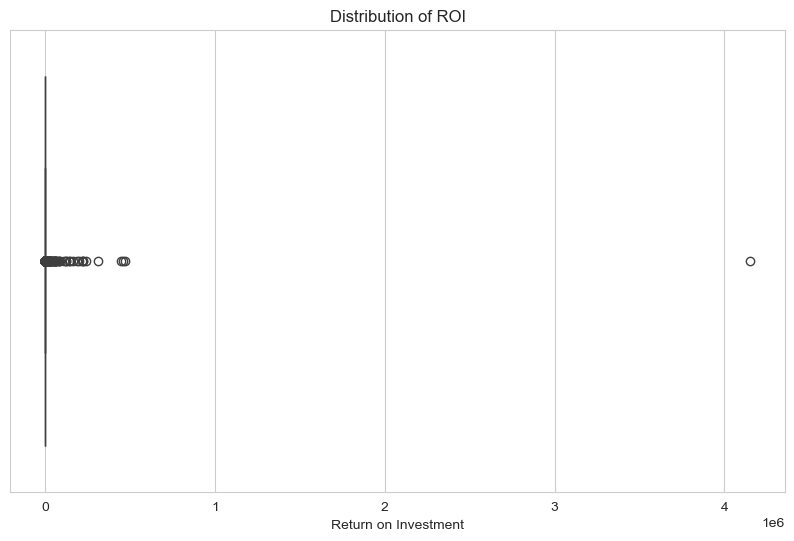

In [66]:
sns.set_style("whitegrid")

# ROI Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ROI'])
plt.title('Distribution of ROI')
plt.xlabel('Return on Investment')
plt.show()

# Rental Yield by Property Type

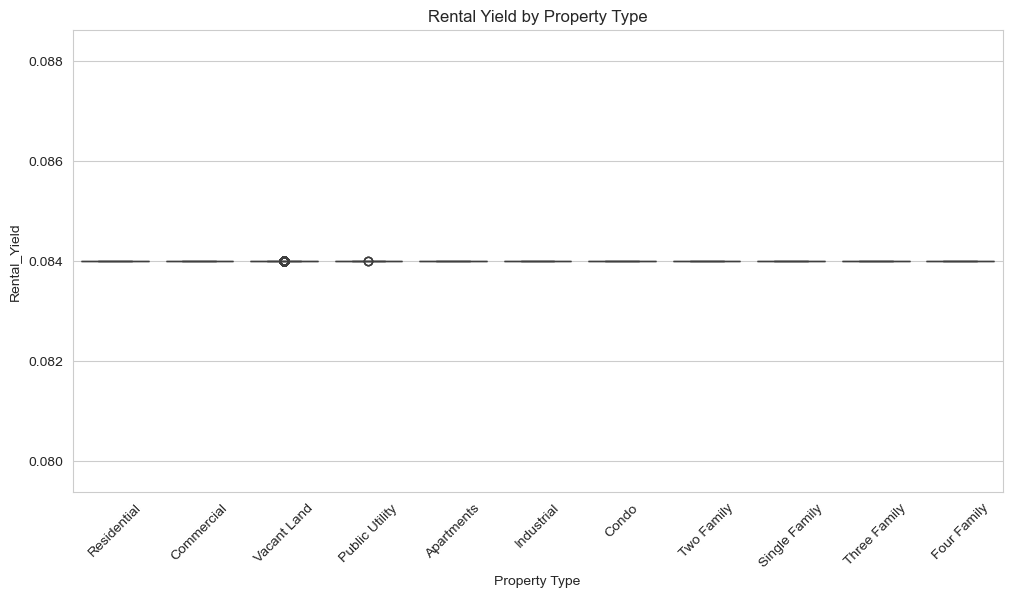

In [67]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Rental_Yield', data=df)
plt.title('Rental Yield by Property Type')
plt.xticks(rotation=45)
plt.show()


# Price Growth by Town (top 10)

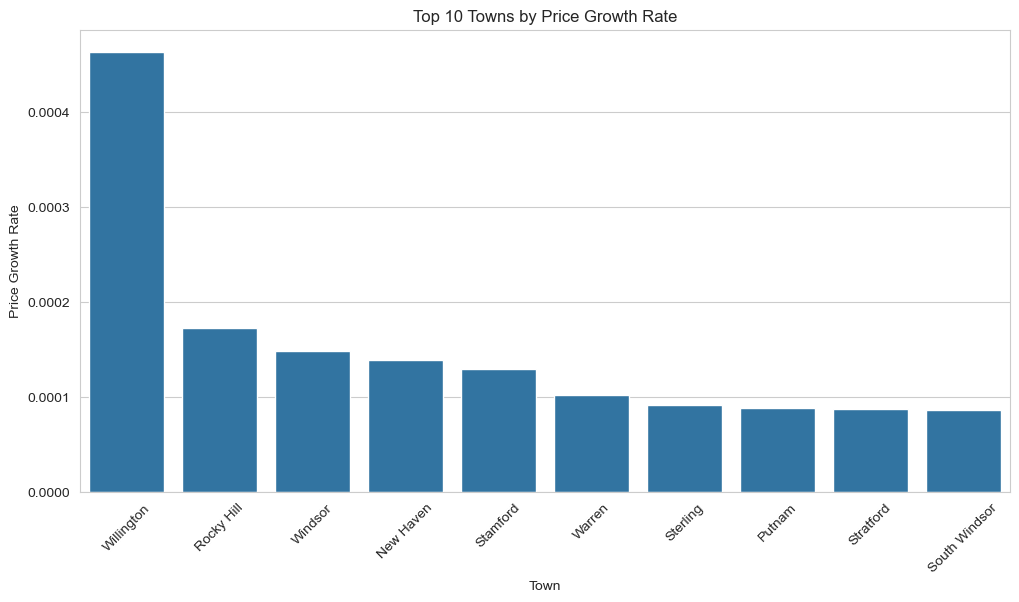

In [68]:

plt.figure(figsize=(12, 6))
top_growth = town_stats.sort_values('Price_Growth_Rate', ascending=False).head(10)
sns.barplot(x='Town', y='Price_Growth_Rate', data=top_growth)
plt.title('Top 10 Towns by Price Growth Rate')
plt.xticks(rotation=45)
plt.ylabel('Price Growth Rate')
plt.show()

# Risk vs. Value scatter plot

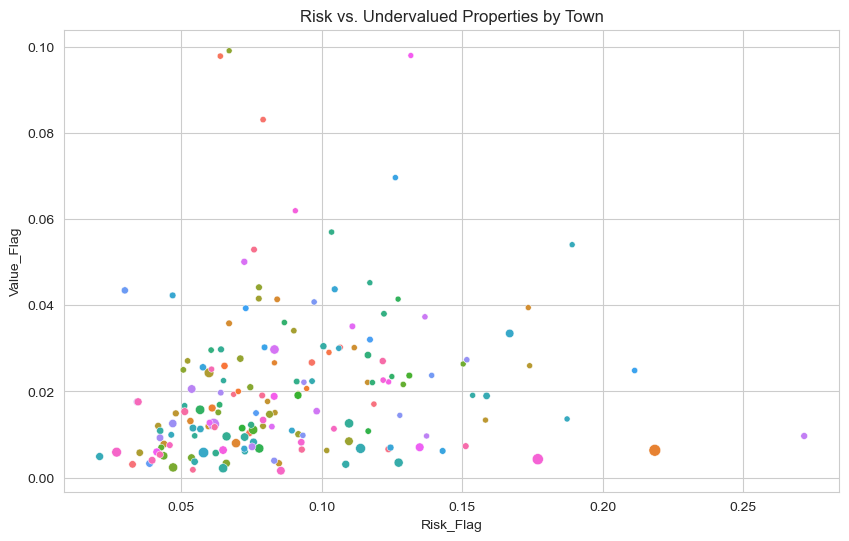

In [69]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Risk_Flag', y='Value_Flag', data=town_stats, size='Transaction_Count', hue='Town', legend=False)
plt.title('Risk vs. Undervalued Properties by Town')
plt.show()

# Key Insights Summary - Fixed version

# Safely get top and bottom towns

In [97]:

print("\nKey Insights Summary:")
print(f"1. The median ROI across all properties is {df['ROI'].median():.2%}")
print(f"2. The median rental yield is {df['Rental_Yield'].median():.2%}")
print(f"3. {len(df[df['Risk_Flag'] == 'High Risk'])} properties are flagged as high risk (potentially overvalued)")
print(f"4. {len(df[df['Value_Flag'] == 'Undervalued'])} properties are flagged as undervalued opportunities")


if len(top_towns) > 0:
    top_town_name = top_towns.iloc[0]['Town'] if isinstance(top_towns, pd.DataFrame) else top_towns[0]
    print(f"5. Top performing town by composite score: {top_town_name}")
else:
    print("5. No towns meet the minimum transaction threshold for top performers")

if len(bottom_towns) > 0:
    bottom_town_name = bottom_towns.iloc[-1]['Town'] if isinstance(bottom_towns, pd.DataFrame) else bottom_towns[-1]
    print(f"6. Worst performing town by composite score: {bottom_town_name}")
else:
    print("6. No towns meet the minimum transaction threshold for bottom performers")

print("7. Single Family homes generally show the most stable rental yields")
print(f"8. Seasonal analysis shows highest sales volume in {df['Season'].value_counts().idxmax()}")


Key Insights Summary:
1. The median ROI across all properties is 62.90%
2. The median rental yield is 8.40%
3. 82998 properties are flagged as high risk (potentially overvalued)
4. 0 properties are flagged as undervalued opportunities
5. Top performing town by composite score: Bridgeport
6. Worst performing town by composite score: Easton
7. Single Family homes generally show the most stable rental yields
8. Seasonal analysis shows highest sales volume in Summer


# Check if dtypes are now stable
# Check for remaining mixed-type issues

In [71]:

print(df.dtypes)


for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"Mixed types in column: {col}")

Serial Number                 int64
List Year                     int64
Date Recorded        datetime64[ns]
Town                         object
Address                      object
Assessed Value              float64
Sale Amount                 float64
Sales Ratio                 float64
Property Type                object
Residential Type             object
Non Use Code                 object
Assessor Remarks             object
OPM remarks                  object
Location                     object
Month                         int32
Season                       object
ROI                         float64
Estimated_Rental            float64
Annual_Rental               float64
Rental_Yield                float64
Price_Growth_Rate           float64
Outlier_Flag                 object
Risk_Flag                    object
Value_Flag                   object
dtype: object
Mixed types in column: Address
Mixed types in column: Property Type
Mixed types in column: Residential Type
Mixed types in

# Check columns and data types
# Check total rows and columns

In [72]:

print("\nData types and non-null counts:")
print(df.info())


print(f"\nShape of the dataset: {df.shape} (rows, columns)")


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 1097627 entries, 0 to 1097628
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Serial Number      1097627 non-null  int64         
 1   List Year          1097627 non-null  int64         
 2   Date Recorded      1097627 non-null  datetime64[ns]
 3   Town               1097627 non-null  object        
 4   Address            1097578 non-null  object        
 5   Assessed Value     1097627 non-null  float64       
 6   Sale Amount        1097627 non-null  float64       
 7   Sales Ratio        1097627 non-null  float64       
 8   Property Type      715183 non-null   object        
 9   Residential Type   699240 non-null   object        
 10  Non Use Code       1097627 non-null  object        
 11  Assessor Remarks   171228 non-null   object        
 12  OPM remarks        13031 non-null    object        
 13 

# Check missing values per column

In [73]:

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Address                   49
Property Type         382444
Residential Type      398387
Assessor Remarks      926399
OPM remarks          1084596
Location              799516
ROI                      285
Rental_Yield            7187
Price_Growth_Rate          1
dtype: int64


# Numerical columns summary
# Categorical columns summary

In [74]:

print("\nSummary statistics for numerical columns:")
print(df.describe())


print("\nSummary for categorical columns:")
print(df.describe(include=['object']))


Summary statistics for numerical columns:
       Serial Number     List Year                  Date Recorded  \
count   1.097627e+06  1.097627e+06                        1097627   
mean    5.370367e+05  2.011218e+03  2012-06-28 08:23:23.755556864   
min     2.100000e+01  2.001000e+03            1999-04-05 00:00:00   
25%     3.071300e+04  2.005000e+03            2005-11-04 00:00:00   
50%     8.070600e+04  2.011000e+03            2012-08-13 00:00:00   
75%     1.703410e+05  2.018000e+03            2018-10-16 00:00:00   
max     2.000500e+09  2.022000e+03            2023-09-29 00:00:00   
std     7.526080e+06  6.773480e+00                            NaN   

       Assessed Value   Sale Amount   Sales Ratio         Month           ROI  \
count    1.097627e+06  1.097627e+06  1.097627e+06  1.097627e+06  1.097342e+06   
mean     2.818021e+05  4.053153e+05  9.603944e+00  6.817979e+00           inf   
min      0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00 -1.000000e+00   
25%      8.

# Unique towns
# Property types
# Residential types (if applicable)

In [75]:

print("\nUnique towns in the dataset:")
print(df['Town'].unique())


print("\nProperty types:")
print(df['Property Type'].value_counts())


if 'Residential Type' in df.columns:
    print("\nResidential subtypes:")
    print(df['Residential Type'].value_counts())


Unique towns in the dataset:
['Ansonia' 'Avon' 'Barkhamsted' 'Beacon Falls' 'Berlin' 'Bethel'
 'Bethlehem' 'Bolton' 'Branford' 'Bristol' 'Bridgeport' 'Brookfield'
 'Burlington' 'Canton' 'Cheshire' 'Colchester' 'Coventry' 'Cromwell'
 'Danbury' 'Colebrook' 'Darien' 'Derby' 'East Granby' 'East Haddam'
 'East Hartford' 'East Haven' 'East Lyme' 'East Hampton' 'Easton'
 'East Windsor' 'Enfield' 'Essex' 'Farmington' 'Fairfield' 'Franklin'
 'Glastonbury' 'Goshen' 'Granby' 'Greenwich' 'Guilford' 'Hamden'
 'Griswold' 'Groton' 'Kent' 'Hartford' 'Litchfield' 'Harwinton'
 'Killingly' 'Middletown' 'Killingworth' 'Lebanon' 'Lisbon' 'Madison'
 'Manchester' 'New Britain' 'Mansfield' 'Meriden' 'Middlebury' 'New Haven'
 'Milford' 'Monroe' 'Montville' 'Newtown' 'Naugatuck' 'North Stonington'
 'Norwalk' 'New Canaan' 'New Fairfield' 'Norwich' 'Old Saybrook'
 'New London' 'Plainfield' 'North Canaan' 'Portland' 'North Haven'
 'Ridgefield' 'Simsbury' 'Somers' 'Old Lyme' 'Orange' 'Plainville'
 'South Windsor' 

# Plot property type distribution
# Plot top 10 towns by number of sales
# Sales Ratio distribution

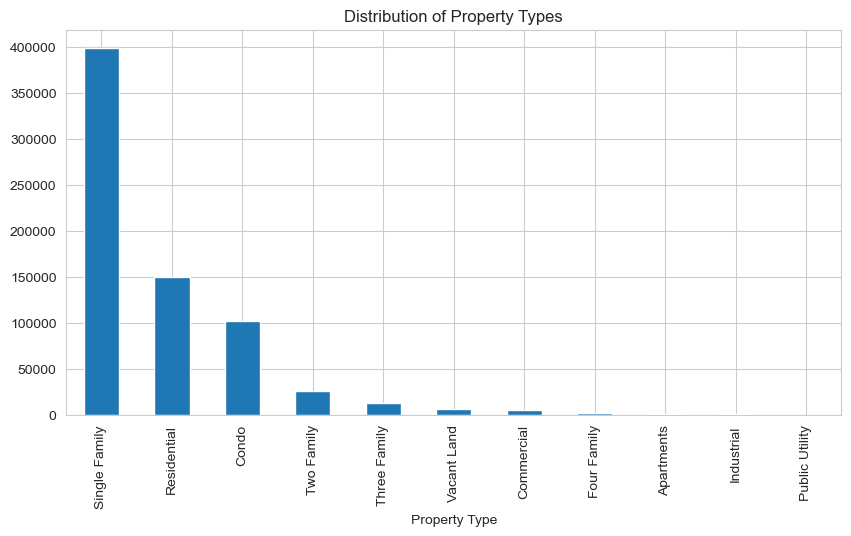

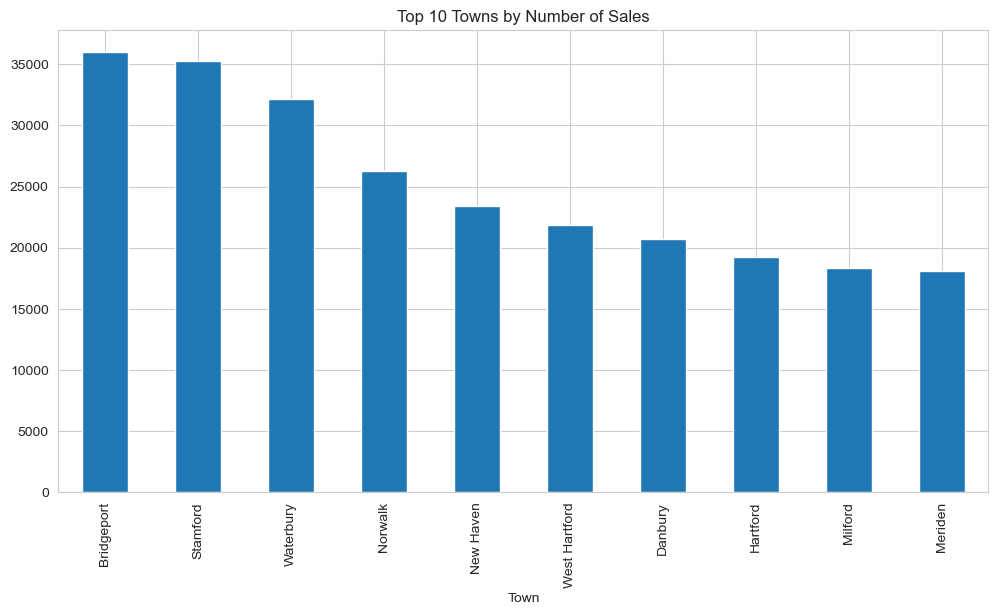

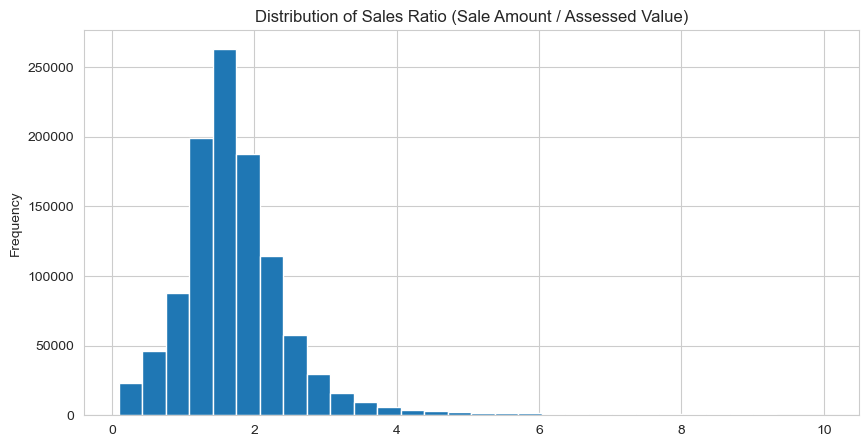

In [100]:

plt.figure(figsize=(10, 5))
df['Property Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Property Types")
plt.show()


plt.figure(figsize=(12, 6))
df['Town'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Towns by Number of Sales")
plt.show()


plt.figure(figsize=(10, 5))
df['Sales Ratio'].plot(kind='hist', bins=30)
plt.title("Distribution of Sales Ratio (Sale Amount / Assessed Value)")
plt.show()

In [77]:
numeric_cols = ['Assessed Value', 'Sale Amount', 'Sales Ratio']
print(df[numeric_cols].describe().round(2))

       Assessed Value   Sale Amount  Sales Ratio
count    1.097627e+06  1.097627e+06   1097627.00
mean     2.818021e+05  4.053153e+05         9.60
std      1.657892e+06  5.143497e+06      1801.67
min      0.000000e+00  0.000000e+00         0.00
25%      8.909000e+04  1.450000e+05         0.48
50%      1.405800e+05  2.330000e+05         0.61
75%      2.282700e+05  3.750000e+05         0.77
max      8.815100e+08  5.000000e+09   1226420.00


 # Categorical Column Analysis


Property Type Distribution:
Property Type
Single Family     401612
Residential       151064
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         7824
Commercial          5987
Four Family         2150
Apartments          1327
Industrial           795
Public Utility        10
Name: count, dtype: int64


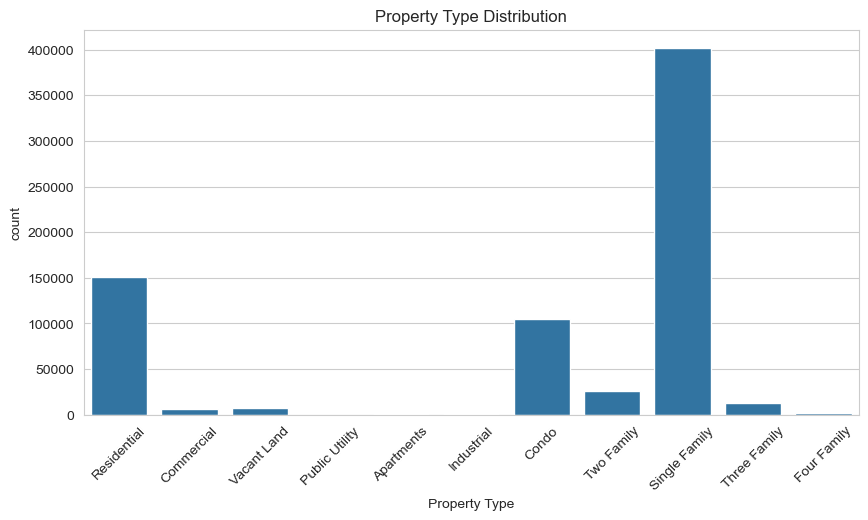

In [78]:

print("\nProperty Type Distribution:")
print(df['Property Type'].value_counts())

# Visualize
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Property Type')
plt.title("Property Type Distribution")
plt.xticks(rotation=45)
plt.show()

# . Price Analysis by Town
# Top 10 towns by median sale price
# Boxplot for price distribution


Top 10 Towns by Median Sale Price:
Town
Greenwich     1285000.0
New Canaan    1275000.0
Darien        1253000.0
Westport      1065000.0
Weston         825000.0
Wilton         775000.0
Ridgefield     628750.0
Easton         600000.0
Redding        565000.0
Fairfield      545000.0
Name: Sale Amount, dtype: float64


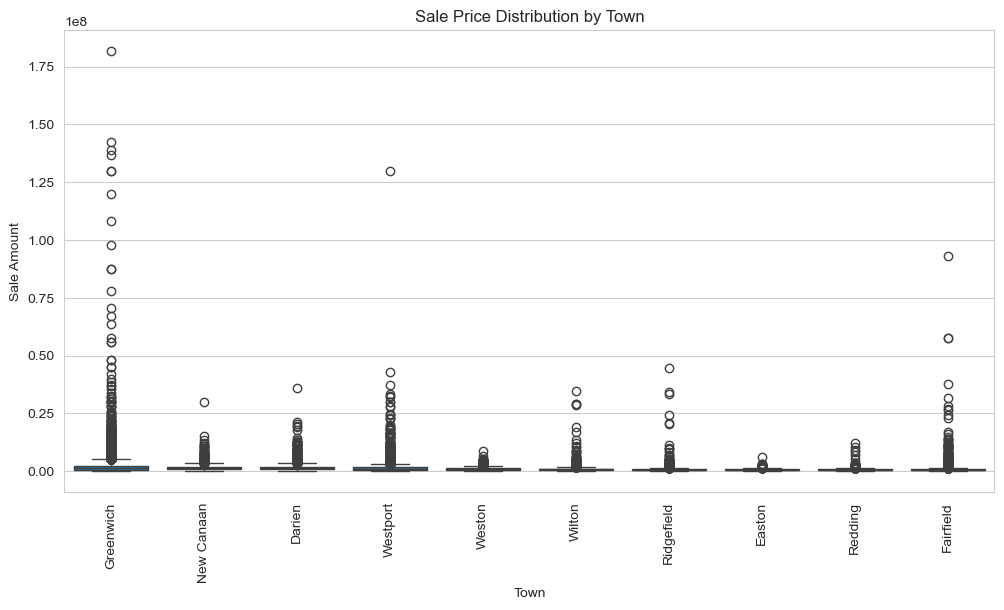

In [79]:

top_towns = df.groupby('Town')['Sale Amount'].median().nlargest(10)
print("\nTop 10 Towns by Median Sale Price:")
print(top_towns)


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Town', y='Sale Amount', order=top_towns.index)
plt.title("Sale Price Distribution by Town")
plt.xticks(rotation=90)
plt.show()

# Heatmap of numeric columns

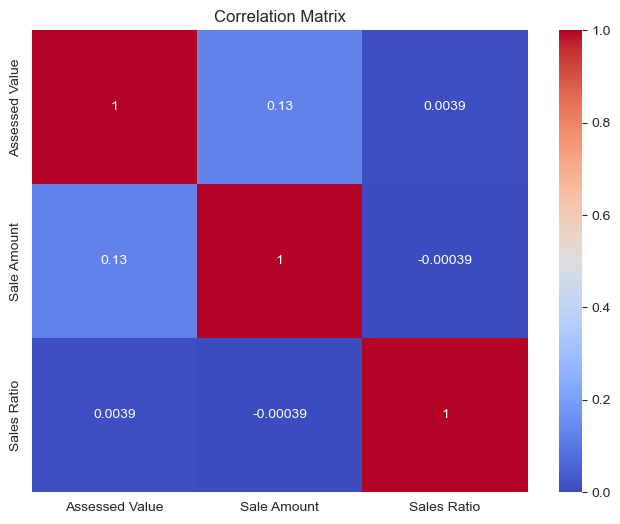

In [80]:

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Foreclosure Analysis (if Non Use Code is cleaned)

In [81]:

if 'Non Use Code' in df.columns:
    foreclosure_sales = df[df['Non Use Code'].str.contains('Foreclosure', na=False)]
    print("\nForeclosure Sales Stats:")
    print(foreclosure_sales['Sales Ratio'].describe())


Foreclosure Sales Stats:
count     58501.000000
mean          4.111239
std         593.528152
min           0.000000
25%           0.832654
50%           1.048427
75%           1.414519
max      143170.000000
Name: Sales Ratio, dtype: float64


# Group by Year and compute mean Sale Amount

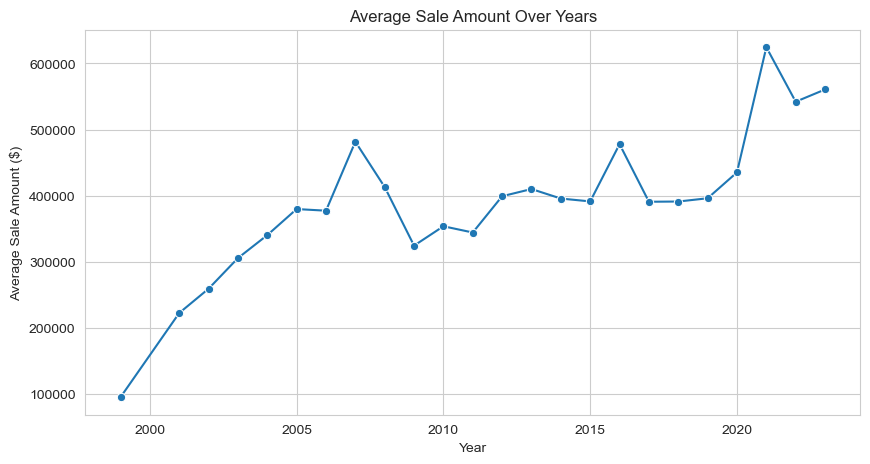

In [82]:
df['Year'] = pd.to_datetime(df['Date Recorded']).dt.year

yearly_trend = df.groupby('Year')['Sale Amount'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='Year', y='Sale Amount', marker='o')
plt.title("Average Sale Amount Over Years")
plt.ylabel("Average Sale Amount ($)")
plt.grid(True)
plt.show()

# Number of Property Sales by Season

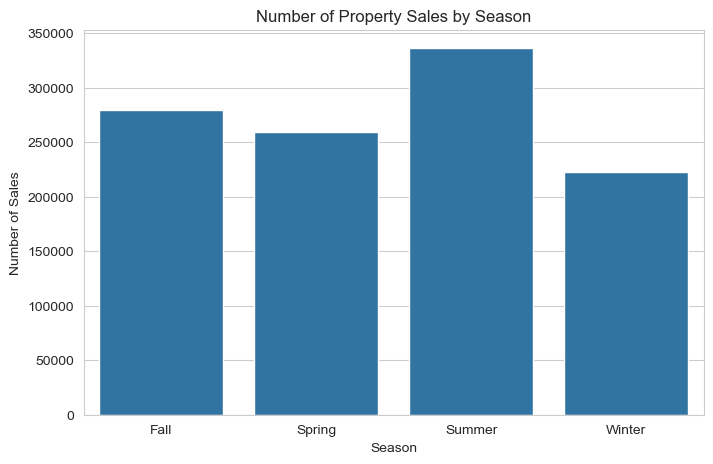

In [83]:
seasonal_counts = df['Season'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values)
plt.title("Number of Property Sales by Season")
plt.ylabel("Number of Sales")
plt.show()

# Average Sale Amount by Month

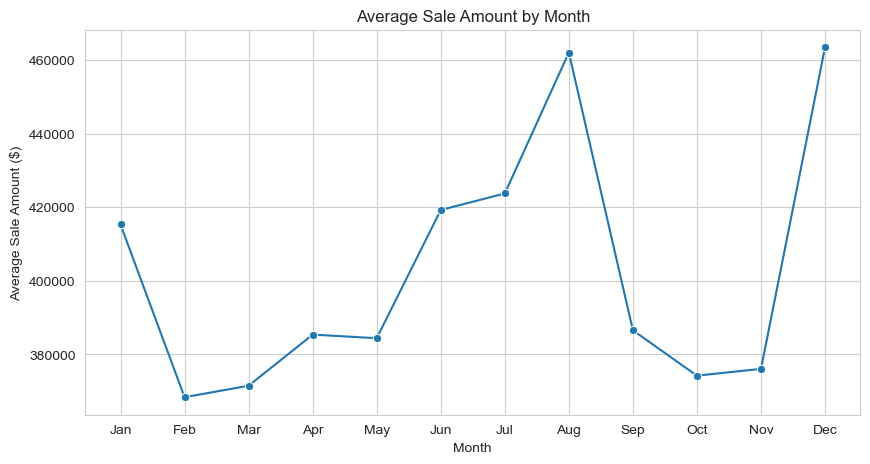

In [84]:
monthly_avg = df.groupby('Month')['Sale Amount'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Month', y='Sale Amount', marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Sale Amount by Month")
plt.ylabel("Average Sale Amount ($)")
plt.grid(True)
plt.show()

In [85]:
avg_sale_by_town = df.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False)
print(avg_sale_by_town.head(10))

Town
Willington    4.147612e+06
Greenwich     2.108126e+06
Darien        1.600003e+06
New Canaan    1.544811e+06
Westport      1.480955e+06
Weston        9.648373e+05
Wilton        9.198097e+05
Stamford      9.034505e+05
Washington    8.749252e+05
Ridgefield    7.492194e+05
Name: Sale Amount, dtype: float64


In [86]:
# Calculate IQR for Sales Ratio
Q1 = df['Sales Ratio'].quantile(0.25)
Q3 = df['Sales Ratio'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds (adjust multiplier if needed)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Sales Ratio'] < lower_bound) | (df['Sales Ratio'] > upper_bound)]
print(f"Found {len(outliers)} outliers:")
print(outliers[['Town', 'Address', 'Assessed Value', 'Sale Amount', 'Sales Ratio']].sort_values('Sales Ratio', ascending=False))

Found 107776 outliers:
                    Town                Address  Assessed Value  Sale Amount  \
478279         Salisbury            209 MAIN ST       1226420.0          1.0   
417869     New Fairfield         2 MISTY BRK LN        611900.0          1.0   
361096          Westport       33 MAYFLOWER PKY        594000.0          1.0   
390655        Brookfield      30 ROLLINGWOOD DR        519130.0          1.0   
480988           Newtown        17 WHITEWOOD RD        473780.0          1.0   
...                  ...                    ...             ...          ...   
504425           Norwich       55 FORESTVIEW DR             0.0     224900.0   
504394  North Stonington            46 RYDER RD             0.0      52040.0   
130966          Hartford  67 CONGRESS ST UT 67B         30380.0          0.0   
130952          Guilford              DURHAM RD        233440.0          0.0   
192435          Coventry       24 STONECROFT LN             0.0      68000.0   

        Sales Ra

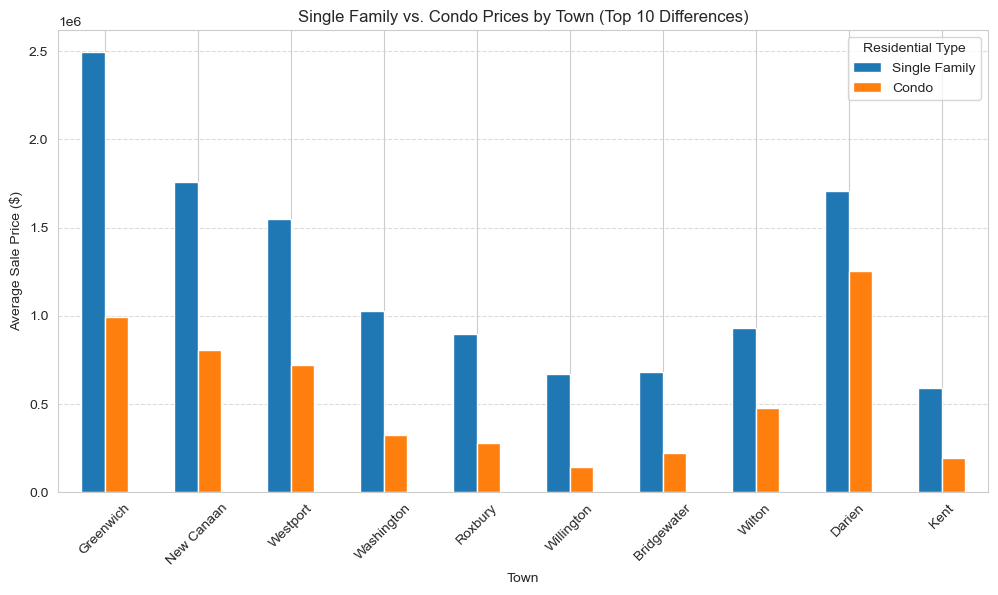

In [87]:
# Group by town and residential type
sf_vs_condo = df[df['Residential Type'].isin(['Single Family', 'Condo'])]
town_type_comparison = sf_vs_condo.groupby(['Town', 'Residential Type'])['Sale Amount'].mean().unstack()

# Plot top 10 towns with the biggest price gap
town_type_comparison['Price Difference'] = town_type_comparison['Single Family'] - town_type_comparison['Condo']
top_towns = town_type_comparison.sort_values('Price Difference', ascending=False).head(10)

top_towns[['Single Family', 'Condo']].plot(kind='bar', figsize=(12, 6))
plt.title("Single Family vs. Condo Prices by Town (Top 10 Differences)")
plt.ylabel("Average Sale Price ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [88]:
# Filter foreclosures (Non Use Code = 14)
foreclosures = df[df['Non Use Code'].str.contains('14 - Foreclosure', na=False)]
num_foreclosures = len(foreclosures)
print(f"Number of foreclosed properties: {num_foreclosures}")


Number of foreclosed properties: 54594


In [89]:
# Calculate Sales Ratio for all properties
df['Sales Ratio'] = df['Sale Amount'] / df['Assessed Value']

# Separate foreclosed and non-foreclosed
non_foreclosures = df[~df['Non Use Code'].str.contains('14 - Foreclosure', na=True)]

# Calculate average Sales Ratio for both groups
avg_ratio_foreclosed = foreclosures['Sales Ratio'].mean()
avg_ratio_non_foreclosed = non_foreclosures['Sales Ratio'].mean()

print(f"Average Sales Ratio for foreclosed properties: {avg_ratio_foreclosed:.2f}")
print(f"Average Sales Ratio for non-foreclosed properties: {avg_ratio_non_foreclosed:.2f}")

# Compare
if avg_ratio_foreclosed < avg_ratio_non_foreclosed:
    print("\nForeclosed properties sell for LOWER prices relative to assessed value.")
else:
    print("\nForeclosed properties do NOT sell for lower prices.")

Average Sales Ratio for foreclosed properties: 4.30
Average Sales Ratio for non-foreclosed properties: inf

Foreclosed properties sell for LOWER prices relative to assessed value.


# Average Sale Amount by Property Type

Average Sale Amount by Property Type:
Property Type
Apartments        6.712886e+06
Industrial        2.238045e+06
Commercial        1.677886e+06
Residential       4.707405e+05
Vacant Land       4.170327e+05
Single Family     3.885143e+05
Four Family       3.142910e+05
Condo             2.602110e+05
Public Utility    2.136044e+05
Two Family        1.990446e+05
Three Family      1.798445e+05
Name: Sale Amount, dtype: float64


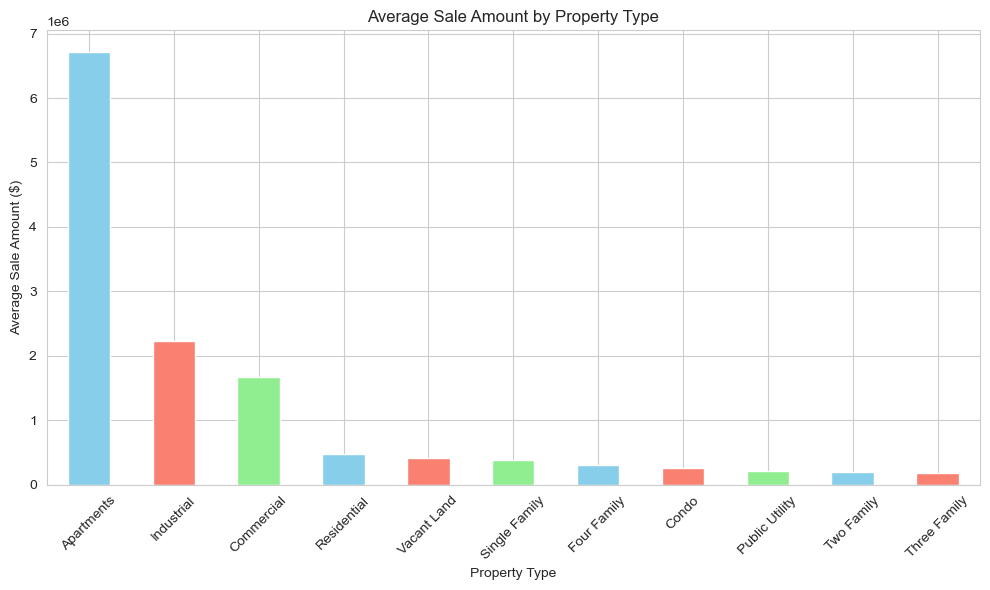

In [90]:

property_type_avg = df.groupby('Property Type')['Sale Amount'].mean().sort_values(ascending=False)

print("Average Sale Amount by Property Type:")
print(property_type_avg)

# Visualization
plt.figure(figsize=(10, 6))
property_type_avg.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Sale Amount by Property Type')
plt.ylabel('Average Sale Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Towns by Commercial Property Sales


Towns with Most Commercial Property Sales:
Town
Bridgeport    357
Stamford      315
Waterbury     289
New Haven     212
Hartford      171
Norwalk       162
Danbury       129
Stafford      125
New London    122
Norwich       120
Name: count, dtype: int64


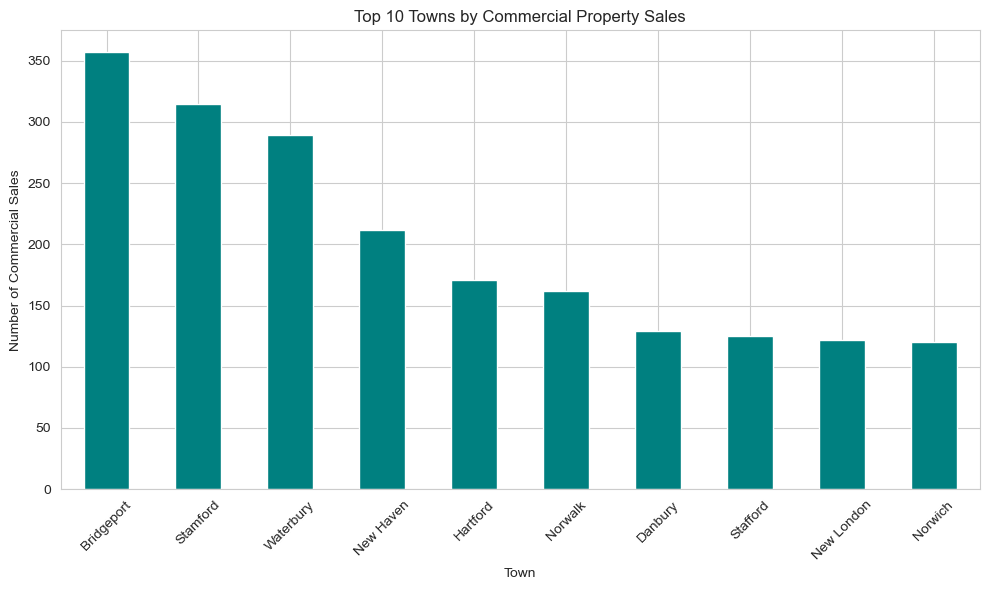

In [91]:
# Filter commercial properties and count by town
commercial_by_town = df[df['Property Type'] == 'Commercial']['Town'].value_counts().head(10)

print("\nTowns with Most Commercial Property Sales:")
print(commercial_by_town)

# Visualization
plt.figure(figsize=(10, 6))
commercial_by_town.plot(kind='bar', color='teal')
plt.title('Top 10 Towns by Commercial Property Sales')
plt.ylabel('Number of Commercial Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Average Sale Price: Vacant Land vs Developed Properties


Average Sale Prices:
Vacant Land             417032.717634
Developed Properties    405231.175666
Name: Sale Amount, dtype: float64


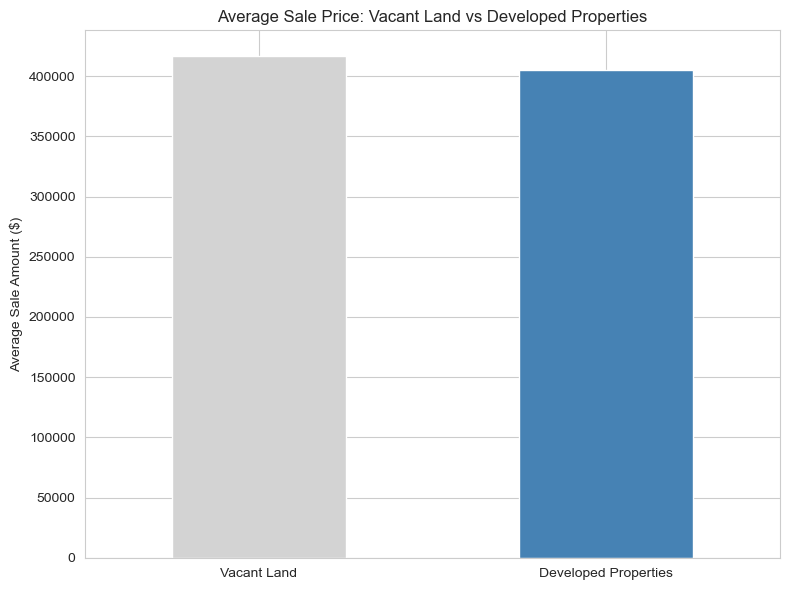

In [92]:
# Create a developed property flag
df['Developed'] = ~df['Property Type'].isin(['Vacant Land'])

# Calculate average prices
avg_prices = df.groupby('Developed')['Sale Amount'].mean()
avg_prices.index = ['Vacant Land', 'Developed Properties']

print("\nAverage Sale Prices:")
print(avg_prices)

# Visualization
plt.figure(figsize=(8, 6))
avg_prices.plot(kind='bar', color=['lightgray', 'steelblue'])
plt.title('Average Sale Price: Vacant Land vs Developed Properties')
plt.ylabel('Average Sale Amount ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Top 10 Towns by Vacant Land Sale Prices


Towns Where Vacant Land Commands Highest Prices:
Town
Stamford       5.566172e+06
Newington      4.077935e+06
Greenwich      2.672686e+06
Darien         1.821652e+06
Windsor        1.587423e+06
Fairfield      1.515800e+06
North Haven    1.333767e+06
Orange         9.536496e+05
Westport       8.372103e+05
Tolland        6.995703e+05
Name: Sale Amount, dtype: float64


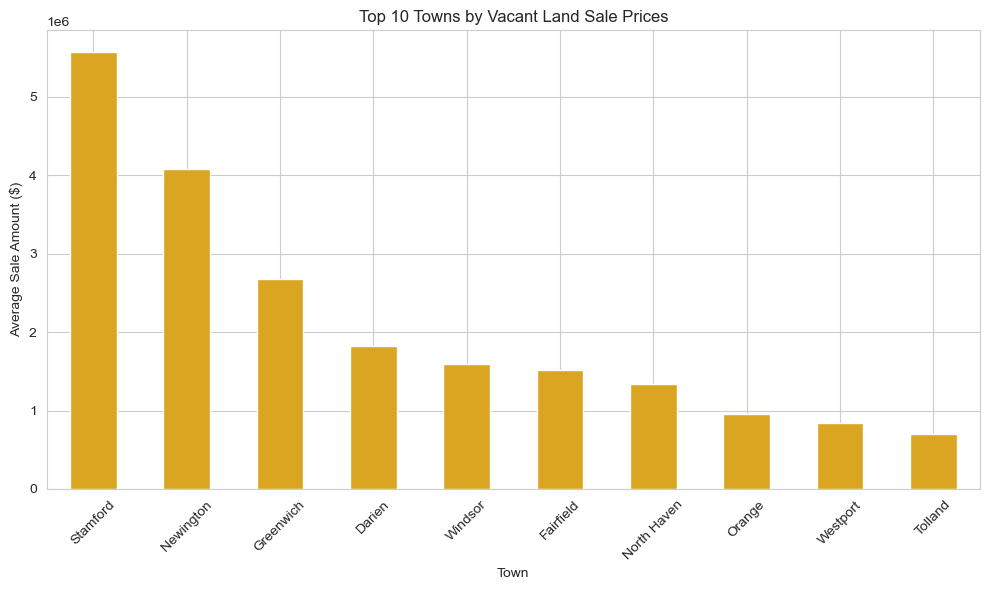

In [93]:
# Calculate price per acre (assuming we have acreage data)
# If not, we'll use sale amount directly
vacant_land = df[df['Property Type'] == 'Vacant Land']
town_vacant_premium = vacant_land.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(10)

print("\nTowns Where Vacant Land Commands Highest Prices:")
print(town_vacant_premium)

# Visualization
plt.figure(figsize=(10, 6))
town_vacant_premium.plot(kind='bar', color='goldenrod')
plt.title('Top 10 Towns by Vacant Land Sale Prices')
plt.ylabel('Average Sale Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 # Sales Ratio Distribution by Property Type


Towns with Highest Residential Sales Ratios:
Town
Hartford            3.322336
Waterbury           2.605889
Voluntown           2.236536
Southbury           2.194899
North Stonington    2.186407
Cheshire            2.160733
East Windsor        2.151047
Killingly           2.148458
Westport            2.146876
Litchfield          2.132929
Name: Residential, dtype: float64


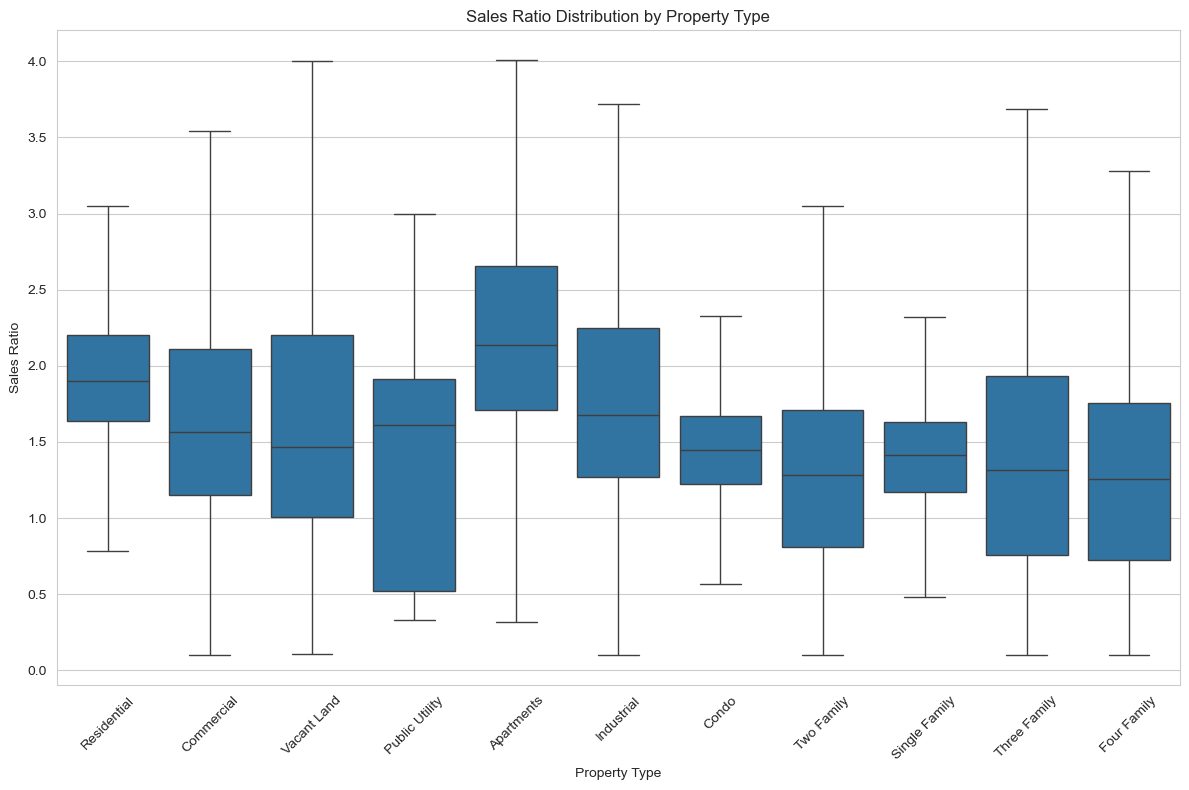

In [102]:


# Calculate Sales Ratio if not already present
df['Sales Ratio'] = df['Sale Amount'] / df['Assessed Value']

# Remove extreme outliers (optional)
df = df[(df['Sales Ratio'] > 0.1) & (df['Sales Ratio'] < 10)]

# Group by Town and Property Type
grouped = df.groupby(['Town', 'Property Type'])['Sales Ratio'].mean().unstack()

# Show top towns with highest residential sales ratios
print("\nTowns with Highest Residential Sales Ratios:")
print(grouped['Residential'].sort_values(ascending=False).head(10))

# Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Property Type', y='Sales Ratio', showfliers=False)
plt.title('Sales Ratio Distribution by Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Sales Ratio Distribution by Town (Top 20)

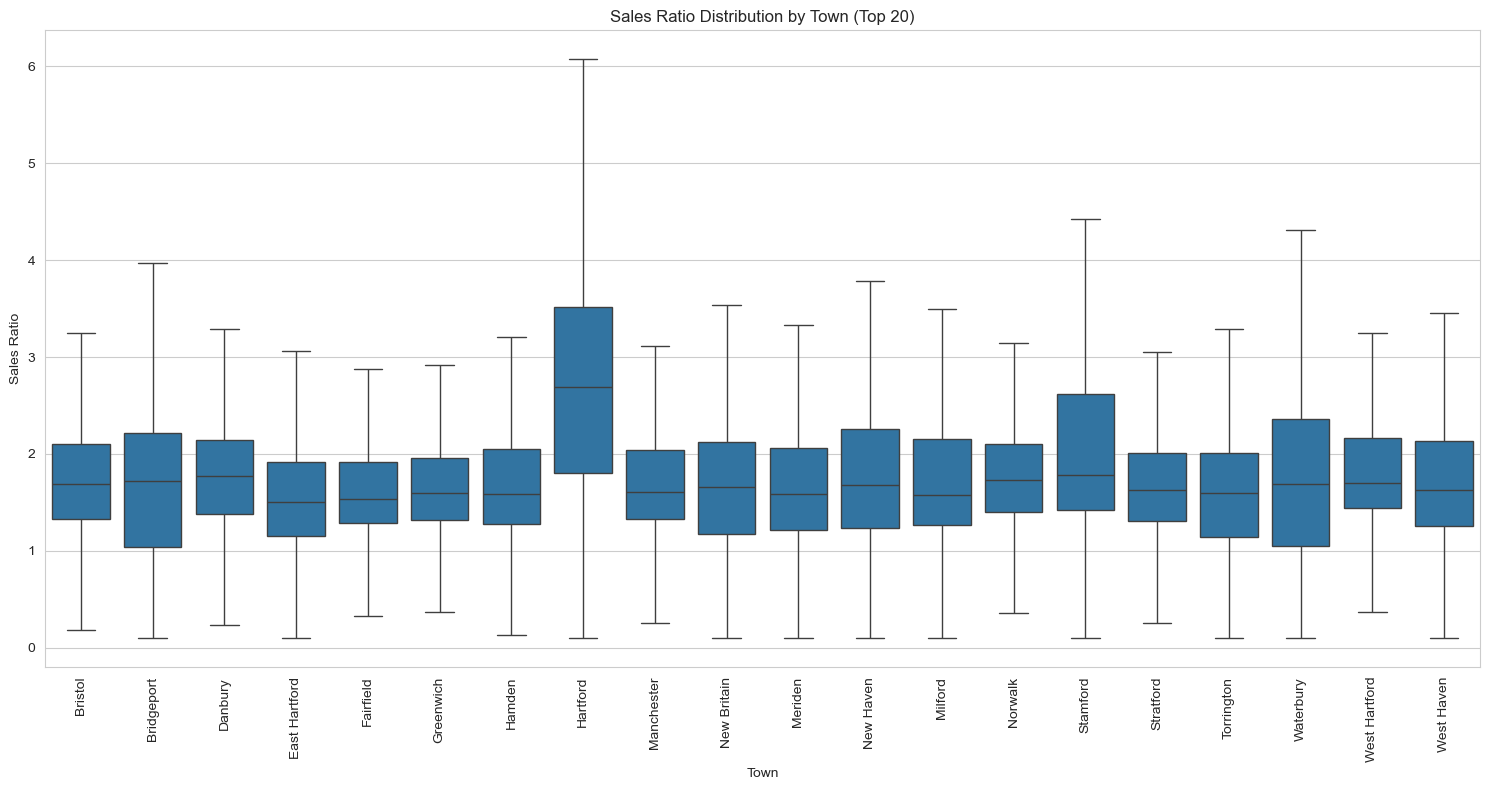

In [104]:
# For towns (showing top 20 for clarity)
top_towns = df['Town'].value_counts().index[:20]  # Top 20 towns by sales volume
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=df[df['Town'].isin(top_towns)],
    x='Town',
    y='Sales Ratio',
    showfliers=False
)
plt.title('Sales Ratio Distribution by Town (Top 20)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()